<a href="https://colab.research.google.com/github/user432/Practical-Deep-Learning-for-Coders-2.0/blob/master/1a_Pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
!pip install -q fastai2 fastcore torch feather-format kornia pyarrow wandb nbdev fastprogress --upgrade 
!pip install torchvision==0.4.2
!pip install Pillow==6.2.1 --upgrade
os._exit(00)

     |████████████████████████████████| 174kB 3.5MB/s 
     |████████████████████████████████| 753.4MB 24kB/s 
     |████████████████████████████████| 122kB 58.9MB/s 
     |████████████████████████████████| 59.2MB 47kB/s 
     |████████████████████████████████| 1.4MB 47.6MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 460kB 59.9MB/s 
     |████████████████████████████████| 92kB 14.0MB/s 
     |████████████████████████████████| 102kB 14.9MB/s 
     |████████████████████████████████| 102kB 15.6MB/s 
     |████████████████████████████████| 71kB 12.8MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 1.4.0 which is incompatible.
     |████████████████████████████████| 734.6MB 9.7kB/s 
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0
     |████████████████████████████████| 2.1MB 3.4MB/s 
E

In [0]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *

In [2]:
path = untar_data(URLs.PETS)
fnames = get_image_files(path/'images')
pat = r'(.+)_\d+.jpg$'

In [0]:
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
bs=64

In [0]:
data = ImageDataBunch.from_name_re(path, fnames, pat, batch_tfms=batch_tfms, 
                                   item_tfms=item_tfms, bs=bs)

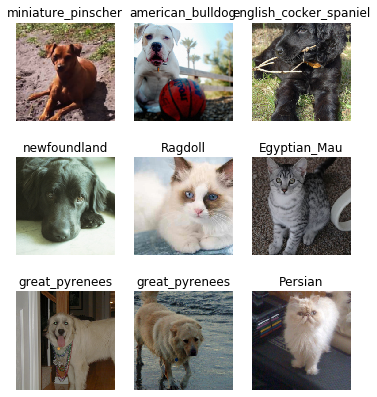

In [5]:
data.show_batch(max_n=9, figsize=(6,7))

In [6]:
learn =  cnn_learner(data, resnet50, pretrained=True, metrics= error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 55.1MB/s]


In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.133905,0.344909,0.102165,01:10
1,0.429418,0.274737,0.080514,01:08
2,0.222827,0.229856,0.071042,01:07
3,0.156034,0.216711,0.069689,01:07


In [0]:
learn.save('stage-1')

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

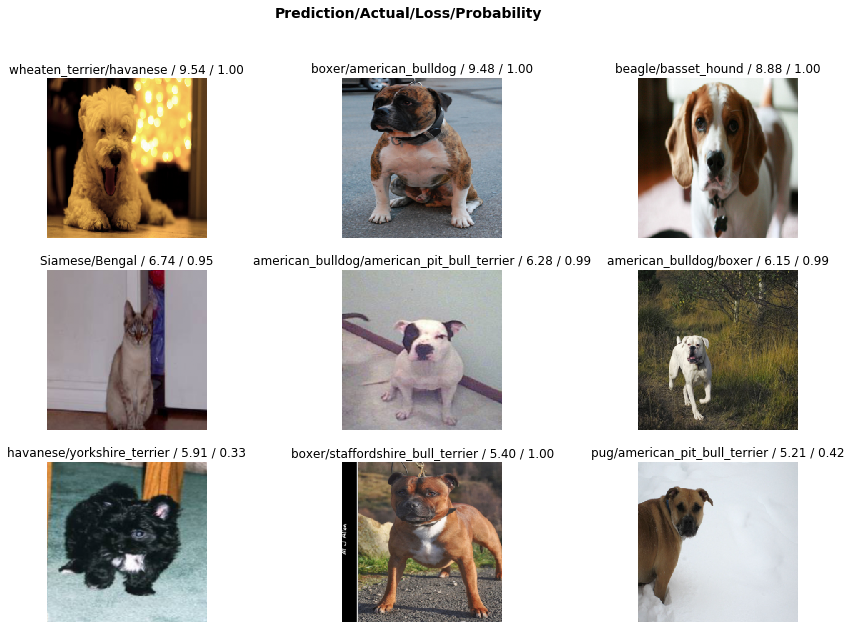

In [10]:
interp.plot_top_losses(9, figsize=(15,10))

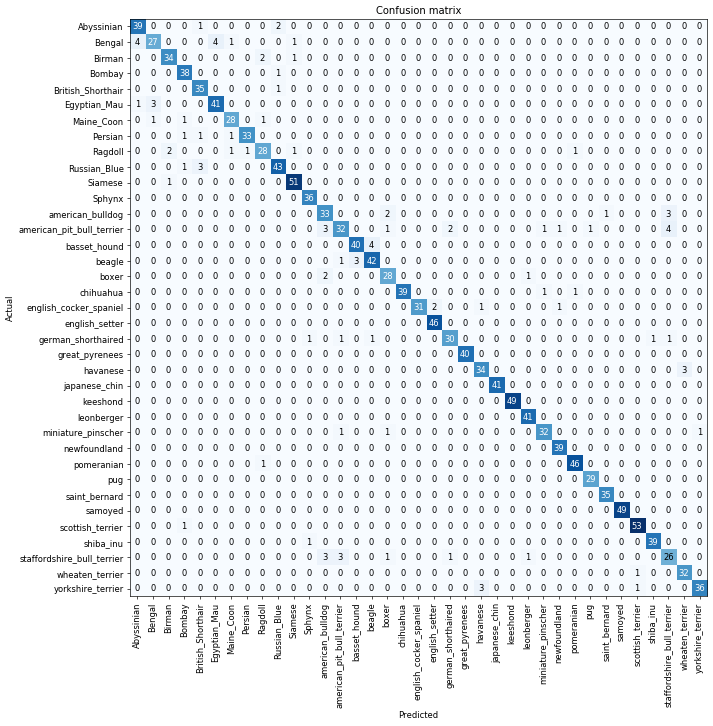

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [12]:
interp.most_confused(min_val=3)

[('Bengal', 'Abyssinian', 4),
 ('Bengal', 'Egyptian_Mau', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('basset_hound', 'beagle', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('beagle', 'basset_hound', 3),
 ('havanese', 'wheaten_terrier', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('yorkshire_terrier', 'havanese', 3)]

In [0]:
learn.load('stage-1');

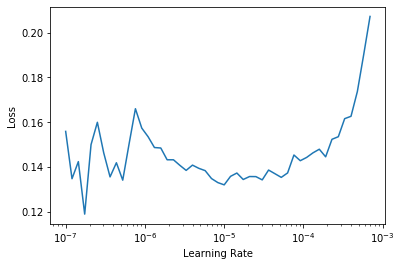

In [18]:
learn.lr_find()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.123417,0.216545,0.070365,01:11
1,0.114150,0.216199,0.065629,01:11
2,0.086900,0.206540,0.062923,01:10
3,0.072711,0.202418,0.061570,01:10


In [0]:
learn.save('stage-2')